********
## Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>
     </ol>
</ol>

In [1]:
### Import Libraries

import os
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D



%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,FeatureAgglomeration,KMeans,FeatureAgglomeration, DBSCAN,SpectralClustering,Birch,MeanShift

<h2>1. <a id='1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>

In [2]:
z=pd.read_csv('Feature_Vector_50_50_2_1.csv',index_col='Source_User')

In [3]:
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


uninfected    2956
infected      2956
Name: Target, dtype: int64

### Feature Set

In [4]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']

# ### Labelling the features
# X.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
#            'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
#            'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
#            'Number of different Destination IP','Average difference in Received Time',
#           'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
#           'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
#           'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
#           'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
#           'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
#           'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
#           'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
#           'Number of Sessions at 22:00','Number of Sessions at 23:00']
# X.head(2)

In [5]:
### Feature Code
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

In [6]:
X.head(2)

,NREC,PAR,PAS,LEN,BYS,BYR,SP,DP,NAPP,SIP,DIP,TDIF,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
Source_User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
005030a1caa49429f288b79917630d9a991690b95dde910c8f00a6b926e68c31,13028,81.582131,42.418790,118.558413,5982.471369,96387.717224,10040.0,119.0,76,89,1964,815.721753,35,31,49,52,42,57,34,100,468,1033,1439,1060,1093,861,1098,879,1147,518,807,640,948,374,131,132
5e47c7187a3b6391023b4d05d98714ea7b357d4264a20824348ab3d007639604,9028,22.550731,14.713226,78.685423,2543.301285,21102.628600,7999.0,77.0,47,20,1460,638.902636,334,280,357,819,646,318,579,265,206,203,217,250,152,343,326,315,340,206,438,595,869,325,294,351


In [7]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [8]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ 0.93573251, -0.13247725, -0.08607116,  0.17726782, -0.16947827,
        -0.12834385,  1.5930859 ,  0.0593255 ,  1.98199678,  0.71391973,
         0.58052177, -0.21147614, -0.36339073, -0.37528617, -0.29277803,
        -0.3024627 , -0.29585271, -0.26846188, -0.3104671 , -0.21251845,
         0.79396987,  2.70638072,  4.35229639,  2.94980632,  3.49384559,
         2.54113695,  3.310934  ,  2.56728444,  3.22851095,  0.9379537 ,
         1.5312164 ,  1.05560141,  1.74425453,  0.31988273, -0.21278945,
        -0.21743768],
       [ 0.47276671, -0.23037542, -0.14950201, -0.24626653, -0.23019615,
        -0.22384617,  1.09181078,  0.00641709,  0.5338364 , -0.87595153,
         0.29877665, -0.21343563,  0.17155116,  0.0527722 ,  0.17772028,
         0.97921634,  0.66161507,  0.16472311,  0.65511607,  0.15723575,
         0.07324994,  0.09238502,  0.17184409,  0.24864181, -0.06626583,
         0.63888154,  0.55891042,  0.52223381,  0.52881604,  0.01650525,
         0.57683002,  0.94246

In [9]:
### Function get_purity will take as input the labels predicted by the algorithm and use them to analyze the purity of clusters
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt=mt.xs('Target')
    a=[]
    for i in range(0,len(mt.index)):
        if i==0:
            a.append(mt.index[i]+"#")
        if i==1:
            a.append(mt.index[i]+"#")
        if i==2:
            a.append(mt.index[i]+"%")
        if i==3:
            a.append(mt.index[i]+"%")
    mt.index=a
    display(mt.round(2))
   
  
### Function get_kmeans will take as input, data and apply kmeans on it for k=1 to 5
### The function will then store the sum of sqaure of distances for each value of k and plot an elbow plot
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

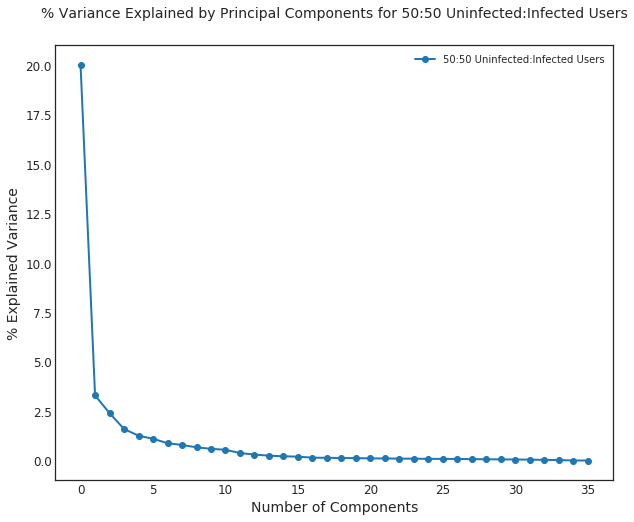

In [10]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'-o', linewidth=2,label='50:50 Uninfected:Infected Users')
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Uninfected:Infected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [11]:
### The cell helps us to analyze better when the explained variance sufficiently flattens out
d=pca.explained_variance_
print("Component\t%Explained Variance\tDecrease in % Explained Variance")
for x in range(0, len(d)):
    if x==0:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",0)
    else:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",((d[x-1]-d[x])*100/d[x-1]))

Component	%Explained Variance	Decrease in % Explained Variance
1 		 20.01625 		 0
2 		 3.29685 		 83.529150929
3 		 2.39958 		 27.2158411645
4 		 1.5955 		 33.5091600446
5 		 1.25794 		 21.156925608
6 		 1.1016 		 12.4282793129
7 		 0.87834 		 20.267106972
8 		 0.7892 		 10.1482643224
9 		 0.66888 		 15.2463971355
10 		 0.59421 		 11.1628330192
11 		 0.54212 		 8.76634836885
12 		 0.38038 		 29.8343797477
13 		 0.3008 		 20.9225487102
14 		 0.24578 		 18.2919440511
15 		 0.2152 		 12.44130405
16 		 0.19534 		 9.22738235378
17 		 0.1448 		 25.87231098
18 		 0.13805 		 4.66229364264
19 		 0.12626 		 8.54262048916
20 		 0.12231 		 3.12796993933
21 		 0.10879 		 11.0498820066
22 		 0.10442 		 4.01711238321
23 		 0.09658 		 7.5064612183
24 		 0.09357 		 3.12501649644
25 		 0.08392 		 10.3110712718
26 		 0.08329 		 0.750169404432
27 		 0.07875 		 5.44830183467
28 		 0.07056 		 10.4012337111
29 		 0.06329 		 10.3048083311
30 		 0.05799 		 8.37040269935
31 		 0.05143 		 11.3080034287
32 		 0.0

In [12]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.93933136792


,NREC,PAR,PAS,LEN,BYS,BYR,SP,DP,NAPP,SIP,DIP,TDIF,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
PC-1,0.221676,0.006615,0.002145,0.006131,0.007372,0.006175,0.198200,0.096267,0.152726,0.094286,0.168799,-0.031172,0.189889,0.183184,0.174536,0.180453,0.174130,0.172741,0.170623,0.175652,0.179973,0.187932,0.182628,0.170016,0.187737,0.190153,0.189134,0.190224,0.193593,0.194889,0.196404,0.202790,0.206469,0.200598,0.196910,0.193793
PC-2,-0.004258,0.539729,0.540475,0.006644,0.356758,0.535883,0.010780,-0.013447,0.025643,0.017951,-0.004626,-0.017733,-0.001800,-0.000903,-0.003305,-0.002965,-0.005010,-0.006661,-0.007947,-0.007322,-0.006854,-0.005531,-0.005343,-0.002733,-0.003299,-0.005886,-0.006651,-0.004235,-0.003052,-0.000709,-0.003167,-0.001101,-0.001264,0.000031,-0.001814,-0.000016
PC-3,0.065687,0.009958,0.014412,0.146229,-0.003200,0.010209,-0.107472,0.294232,-0.212891,-0.224956,0.190922,0.107366,0.164885,0.230179,0.324885,0.317844,0.284139,0.256696,0.184081,0.055837,-0.062367,-0.119388,-0.194163,-0.226572,-0.189120,-0.151424,-0.153104,-0.146350,-0.139827,-0.132332,-0.054179,-0.063077,-0.026552,-0.060639,-0.027727,0.040196
PC-4,-0.040719,0.003103,0.010419,0.289689,-0.004162,0.003562,-0.123306,0.462903,-0.110812,-0.129612,0.319866,0.094008,0.035467,0.022924,0.062404,-0.072970,-0.231360,-0.272125,-0.331542,-0.299647,-0.235517,-0.113085,-0.040387,0.051165,0.117296,0.158983,0.179891,0.157434,0.109878,0.088613,0.083766,0.028578,0.039133,0.047447,0.039100,0.067190
PC-5,0.022192,0.017265,0.038353,0.193581,-0.018983,0.018573,-0.126242,-0.039087,-0.376152,-0.456942,-0.129164,0.529276,-0.109635,-0.171567,-0.171535,-0.101435,0.016373,0.057577,0.144910,0.185960,0.209443,0.180440,0.188534,0.130898,0.083130,0.064864,0.046181,0.039048,0.048989,0.045857,0.009467,0.024691,0.006485,0.022441,0.008941,-0.070383
PC-6,0.039429,0.005862,0.005296,-0.441560,-0.012219,0.006397,-0.030203,-0.308385,-0.126184,-0.257695,-0.223488,0.230529,0.249828,0.195121,0.087459,0.004191,-0.072393,-0.122231,-0.188761,-0.211807,-0.141700,-0.066609,-0.102817,-0.152334,-0.105371,-0.053946,0.001956,-0.020296,0.024636,0.044048,0.096208,0.140458,0.152750,0.210797,0.268056,0.262835
PC-7,-0.000473,-0.022056,-0.026631,0.603578,0.065542,-0.026682,0.144301,-0.252785,0.230468,0.385202,-0.128133,0.488362,0.086943,0.088531,0.015837,0.003343,-0.016733,-0.027860,-0.053031,-0.056699,-0.048008,-0.047494,-0.080962,-0.092636,-0.077986,-0.094608,-0.074230,-0.056805,-0.027768,-0.015326,0.003126,0.047273,0.038420,0.055252,0.071458,0.096238
PC-8,-0.023412,-0.007847,-0.006821,-0.537990,0.063048,-0.009833,0.042320,0.217470,0.148899,0.300941,0.201930,0.630595,-0.083390,-0.015266,0.053761,0.053744,0.019848,0.024022,0.011440,0.007846,-0.038122,-0.047865,-0.001745,0.080186,0.068226,0.053695,0.029491,0.032545,-0.012227,-0.024141,-0.042895,-0.093815,-0.085362,-0.128275,-0.153047,-0.115244
PC-9,0.002408,-0.222177,-0.126671,-0.012191,0.922536,-0.258850,-0.035279,0.025302,-0.039375,-0.061929,-0.002107,-0.055895,0.007912,-0.008387,-0.005800,-0.014653,-0.009759,-0.009394,-0.000584,0.007308,0.018945,0.032622,0.024260,0.016350,0.003862,-0.007745,-0.017240,-0.022912,-0.018147,-0.016073,-0.005254,0.005914,0.010961,0.021452,0.022182,0.021108
PC-10,0.007996,0.010935,0.006874,0.013477,-0.046982,0.013106,-0.015317,0.007146,-0.015794,0.015612,0.008704,-0.011943,0.208910,0.177743,0.126572,0.043421,-0.069094,-0.109202,-0.158984,-0.107026,0.071581,0.252464,0.377663,0.377591,0.177550,-0.007664,-0.075821,-0.242635,-0.287319,-0.381779,-0.296187,-0.195553,-0.078381,-0.000776,0.115407,0.160101


In [13]:
pca_inv_data_50=pca.components_

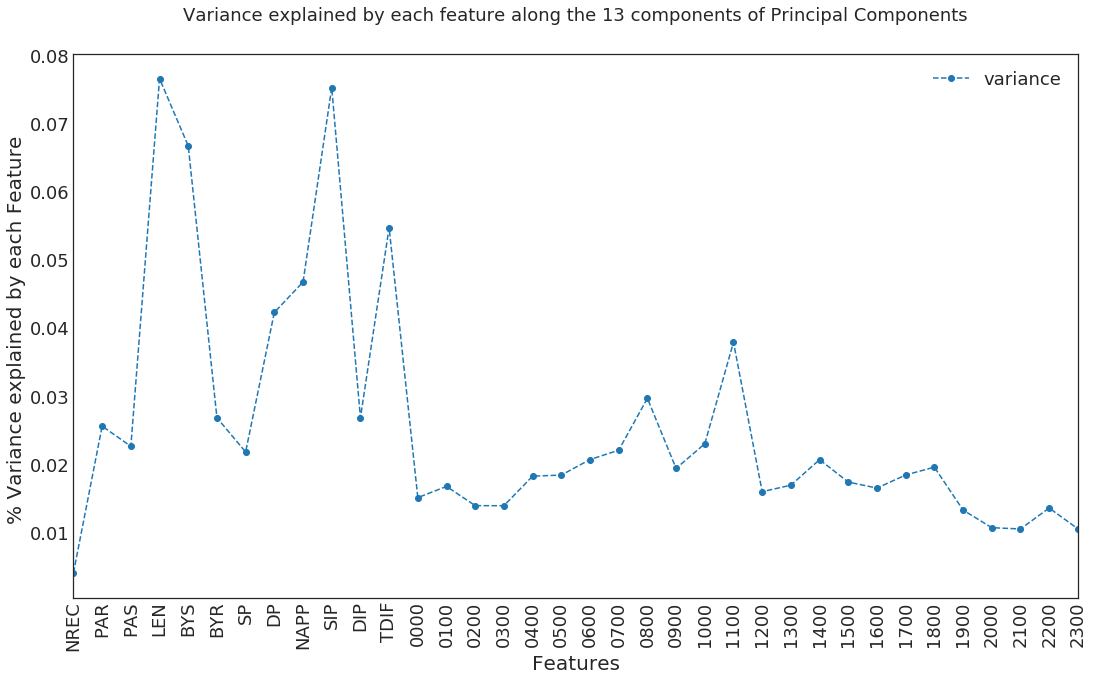

In [14]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 3.74157687643e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.00,0.0
uninfected#,2955.00,1.0
infected%,50.01,0.0
uninfected%,49.99,100.0


Sum of square of distances is: 7.24412912385e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2938.00,0.0,18.00
uninfected#,2930.00,1.0,25.00
infected%,50.07,0.0,41.86
uninfected%,49.93,100.0,58.14


Sum of square of distances is: 3.92777243832e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,374.00,0.0,2574.00,8.00
uninfected#,180.00,1.0,2760.00,15.00
infected%,67.51,0.0,48.26,34.78
uninfected%,32.49,100.0,51.74,65.22


Sum of square of distances is: 2.3577783238e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



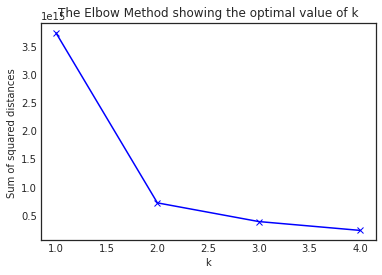

The minimum sum of sqaures of distances is : 2.3577783238e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [15]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 212832.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2697.00,259.00
uninfected#,2943.00,13.00
infected%,47.82,95.22
uninfected%,52.18,4.78


Sum of square of distances is: 156490.52114

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,1300.00,97.0,1559.00
uninfected#,2673.00,5.0,278.00
infected%,32.72,95.1,84.87
uninfected%,67.28,4.9,15.13


Sum of square of distances is: 129565.466867

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,934.00,223.00,1790.00,9.0
uninfected#,2536.00,9.00,410.00,1.0
infected%,26.92,96.12,81.36,90.0
uninfected%,73.08,3.88,18.64,10.0


Sum of square of distances is: 110278.084946

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



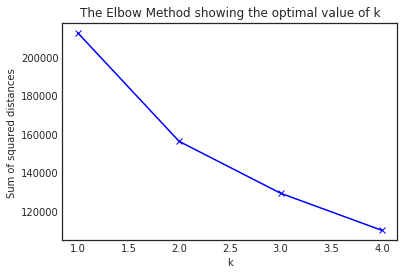

The minimum sum of sqaures of distances is : 110278.084946  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [16]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.714120291626 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 17733.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.00,0.0
uninfected#,2955.00,1.0
infected%,50.01,0.0
uninfected%,49.99,100.0


Sum of square of distances is: 12826.6489166

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2485.00,471.00,0.0
uninfected#,2918.00,37.00,1.0
infected%,45.99,92.72,0.0
uninfected%,54.01,7.28,100.0


Sum of square of distances is: 9910.0603454

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2109.00,0.0,837.00,10.00
uninfected#,2832.00,1.0,122.00,1.00
infected%,42.68,0.0,87.28,90.91
uninfected%,57.32,100.0,12.72,9.09


Sum of square of distances is: 7427.89926174

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



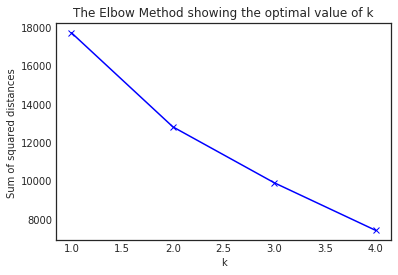

The minimum sum of sqaures of distances is : 7427.89926174  for k 4


In [17]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.758432301607 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 23644.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.00,0.0
uninfected#,2955.00,1.0
infected%,50.01,0.0
uninfected%,49.99,100.0


Sum of square of distances is: 18735.7768459

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2495.00,0.0,461.00
uninfected#,2920.00,1.0,35.00
infected%,46.08,0.0,92.94
uninfected%,53.92,100.0,7.06


Sum of square of distances is: 15818.3193003

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2413.00,0.0,1.0,542.0
uninfected#,2904.00,1.0,0.0,51.0
infected%,45.38,0.0,100.0,91.4
uninfected%,54.62,100.0,0.0,8.6


Sum of square of distances is: 12900.0476702

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



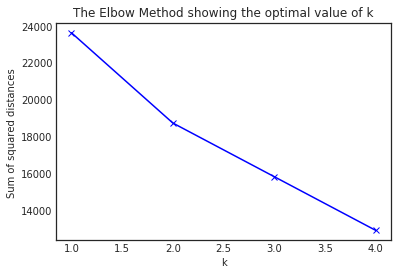

The minimum sum of sqaures of distances is : 12900.0476702  for k 4


In [18]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.793369250389 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 29555.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.00,0.0
uninfected#,2955.00,1.0
infected%,50.01,0.0
uninfected%,49.99,100.0


Sum of square of distances is: 24620.8440269

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,151.00,2805.00,0.0
uninfected#,27.00,2928.00,1.0
infected%,84.83,48.93,0.0
uninfected%,15.17,51.07,100.0


Sum of square of distances is: 21238.1116514

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2807.00,0.0,1.0,148.00
uninfected#,2928.00,1.0,0.0,27.00
infected%,48.95,0.0,100.0,84.57
uninfected%,51.05,100.0,0.0,15.43


Sum of square of distances is: 18183.8481814

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



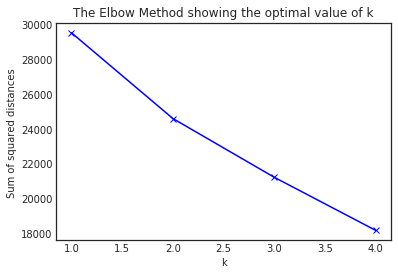

The minimum sum of sqaures of distances is : 18183.8481814  for k 4


In [19]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.823964137842 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 35466.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.00,0.0
uninfected#,2955.00,1.0
infected%,50.01,0.0
uninfected%,49.99,100.0


Sum of square of distances is: 30531.5713742

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2525.00,0.0,431.00
uninfected#,899.00,1.0,2056.00
infected%,73.74,0.0,17.33
uninfected%,26.26,100.0,82.67


Sum of square of distances is: 27087.382293

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2516.00,436.0,4.0,0.0
uninfected#,899.00,2056.0,0.0,1.0
infected%,73.67,17.5,100.0,0.0
uninfected%,26.33,82.5,0.0,100.0


Sum of square of distances is: 23489.7980713

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



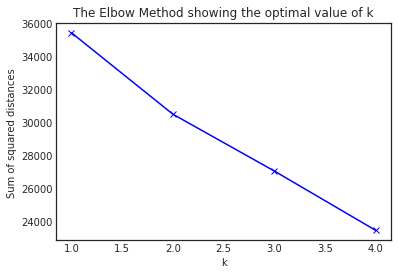

The minimum sum of sqaures of distances is : 23489.7980713  for k 4


In [20]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.888853733246 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 53199.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.00,0.0
uninfected#,2955.00,1.0
infected%,50.01,0.0
uninfected%,49.99,100.0


Sum of square of distances is: 48062.3207453

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2414.00,0.0,542.00
uninfected#,887.00,1.0,2068.00
infected%,73.13,0.0,20.77
uninfected%,26.87,100.0,79.23


Sum of square of distances is: 44002.2048075

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,525.00,2318.00,0.0,113.00
uninfected#,2047.00,898.00,1.0,10.00
infected%,20.41,72.08,0.0,91.87
uninfected%,79.59,27.92,100.0,8.13


Sum of square of distances is: 40778.9418141

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



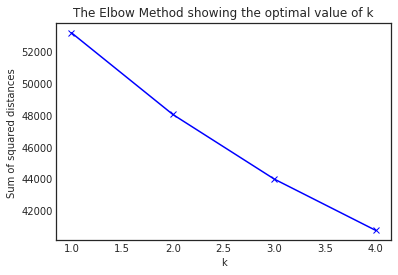

The minimum sum of sqaures of distances is : 40778.9418141  for k 4


In [21]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.920413232135 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 65021.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.00,0.0
uninfected#,2955.00,1.0
infected%,50.01,0.0
uninfected%,49.99,100.0


Sum of square of distances is: 59882.9723759

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2409.00,544.00,3.0
uninfected#,881.00,2075.00,0.0
infected%,73.22,20.77,100.0
uninfected%,26.78,79.23,0.0


Sum of square of distances is: 56690.6902291

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2951.00,0.0,3.0,2.00
uninfected#,2925.00,1.0,0.0,30.00
infected%,50.22,0.0,100.0,6.25
uninfected%,49.78,100.0,0.0,93.75


Sum of square of distances is: 51883.6012153

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



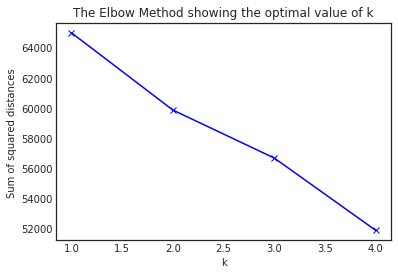

The minimum sum of sqaures of distances is : 51883.6012153  for k 4


In [22]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.930977531224 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 70932.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.00,0.0
uninfected#,2955.00,1.0
infected%,50.01,0.0
uninfected%,49.99,100.0


Sum of square of distances is: 65792.2646321

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2427.00,526.0,3.0
uninfected#,878.00,2078.0,0.0
infected%,73.43,20.2,100.0
uninfected%,26.57,79.8,0.0


Sum of square of distances is: 62538.2660295

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,517.00,111.00,0.0,2328.00
uninfected#,2058.00,10.00,1.0,887.00
infected%,20.08,91.74,0.0,72.41
uninfected%,79.92,8.26,100.0,27.59


Sum of square of distances is: 58296.5356673

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



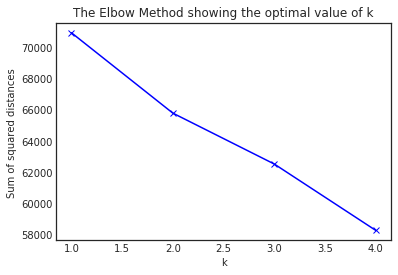

The minimum sum of sqaures of distances is : 58296.5356673  for k 4


In [23]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.93933136792 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,2956.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 76843.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2952.00,4.0
uninfected#,2956.00,0.0
infected%,49.97,100.0
uninfected%,50.03,0.0


Sum of square of distances is: 72436.8386572

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,1537.00,1416.00,3.0
uninfected#,761.00,2195.00,0.0
infected%,66.88,39.21,100.0
uninfected%,33.12,60.79,0.0


Sum of square of distances is: 68627.6334996

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,95.00,507.00,2354.00,0.0
uninfected#,8.00,2265.00,682.00,1.0
infected%,92.23,18.29,77.54,0.0
uninfected%,7.77,81.71,22.46,100.0


Sum of square of distances is: 64015.5730104

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



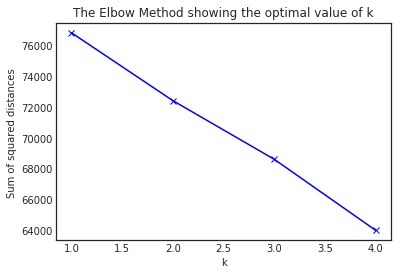

The minimum sum of sqaures of distances is : 64015.5730104  for k 4


In [24]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

<h2>2. <a id='2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>

#### We represent  Infected Users as 1 and Uninfected Users as 0

In [25]:
## Read the csv file which contains the data aggregated on user level for 70:30 Uninfected: Infected Users
z=pd.read_csv('Feature_Vector_70_30_2_1.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


uninfected    8868
infected      2956
Name: Target, dtype: int64

### feature Set

In [26]:
### Build the feature set
X=z.iloc[:,z.columns!='Target']


### Labelling the features
X.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

### Labelling the feature code
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
X.head(2)

,NREC,PAR,PAS,LEN,BYS,BYR,SP,DP,NAPP,SIP,DIP,TDIF,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
Source_User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51f6585d84b48f61e4ba4b46f485a4e16d87de555242f8a3560c75d1ef1ce72d,297,92.013468,43.956229,44.481481,3985.777778,124855.555556,290.0,7.0,18,7,101,14270.077441,0,0,0,0,0,0,0,1,2,140,13,5,42,15,8,56,11,1,2,1,0,0,0,0
17597c775e70c012f6e3b9469af3b4350d99ee2eb449363631da8be22b467b93,1115,269.784753,591.518386,60.361435,812095.008969,34491.324664,1097.0,10.0,28,75,250,9408.492377,0,0,10,4,4,3,2,0,55,33,41,70,98,104,124,103,106,170,120,48,18,0,2,0


In [27]:
### We will store the labels ['Infected','Uninfected'] in a separate dataframe
target=z.Target.reset_index(drop=True)

### Scaled X

In [28]:
### Retain the original data and column names
orig_X=X.copy()

## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)

In [29]:
scaled_X[0:2]

array([[ -3.32624724e-01,  -9.27701680e-02,  -7.89488876e-02,
         -5.11552563e-01,  -7.28409751e-02,  -6.69387830e-02,
         -6.29708249e-01,  -6.83927364e-02,  -6.34991232e-01,
         -1.00897451e+00,  -3.99277692e-01,  -1.17394389e-01,
         -3.16671694e-01,  -3.05338516e-01,  -2.60669875e-01,
         -2.04025261e-01,  -1.75069281e-01,  -1.60697724e-01,
         -1.73910612e-01,  -2.25005260e-01,  -3.34525102e-01,
          4.71775370e-02,  -4.10018163e-01,  -4.60011092e-01,
         -3.41283903e-01,  -4.62142657e-01,  -4.74846406e-01,
         -2.74808158e-01,  -4.31371275e-01,  -4.47449529e-01,
         -4.30327751e-01,  -4.18495849e-01,  -4.19166910e-01,
         -4.00408457e-01,  -3.71198418e-01,  -3.58977320e-01],
       [ -2.44225479e-01,   2.22709883e-01,   1.27569112e+00,
         -3.72194076e-01,   4.23969593e+00,  -1.90031952e-01,
         -3.95952674e-01,  -6.34308457e-02,  -1.16859981e-01,
          6.29976141e-01,  -2.91150072e-01,  -1.62940038e-01,
       

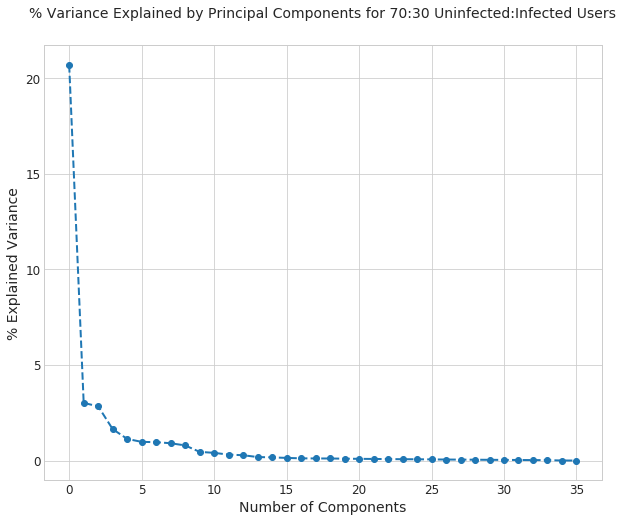

In [30]:
### Plot the scree plot to analyze the number of components to be selected for PCA
sns.set_style('whitegrid')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 70:30 Uninfected:Infected Users',size=14,y=1.05)
### Code to save the plot
# plt.savefig('B.jpeg',dpi=1200)
plt.show()

In [31]:
### The cell helps us to analyze better when the explained variance sufficiently flattens out
d=pca.explained_variance_
print("Component\t%Explained Variance\tDecrease in % Explained Variance")
for x in range(0, len(d)):
    if x==0:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",0)
    else:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",((d[x-1]-d[x])*100/d[x-1]))

Component	%Explained Variance	Decrease in % Explained Variance
1 		 20.67137 		 0
2 		 3.01383 		 85.4202656886
3 		 2.83252 		 6.01581019716
4 		 1.64239 		 42.0166199967
5 		 1.13175 		 31.091585174
6 		 0.97557 		 13.8000173616
7 		 0.96059 		 1.53500714381
8 		 0.90344 		 5.94906921642
9 		 0.79048 		 12.5040796341
10 		 0.45342 		 42.6401294624
11 		 0.40139 		 11.4735053397
12 		 0.30907 		 23.0000490701
13 		 0.27764 		 10.1711696121
14 		 0.18226 		 34.3516102067
15 		 0.16526 		 9.32972558016
16 		 0.13678 		 17.2303042366
17 		 0.115 		 15.9255000429
18 		 0.10852 		 5.63367109981
19 		 0.10649 		 1.874672863
20 		 0.09704 		 8.87569764388
21 		 0.0886 		 8.69442789289
22 		 0.08291 		 6.42676996248
23 		 0.07559 		 8.82019925784
24 		 0.06888 		 8.8811042883
25 		 0.06632 		 3.70889272949
26 		 0.05955 		 10.2101002977
27 		 0.05167 		 13.2360070072
28 		 0.04801 		 7.08547766265
29 		 0.04294 		 10.5634104357
30 		 0.0373 		 13.1215954621
31 		 0.03313 		 11.1908654105
32 	

In [32]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.954459969079


,NREC,PAR,PAS,LEN,BYS,BYR,SP,DP,NAPP,SIP,DIP,TDIF,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
PC-1,0.215217,0.006527,0.002001,-0.000759,0.000472,0.006370,0.170797,0.079744,0.130540,0.085707,0.146109,-0.025346,0.195031,0.191167,0.185005,0.183582,0.177147,0.173034,0.173835,0.178860,0.187308,0.194356,0.190759,0.183356,0.189383,0.190847,0.191198,0.195631,0.198422,0.200380,0.196025,0.201790,0.202776,0.198149,0.194755,0.196675
PC-2,-0.042745,0.530517,0.528916,0.008615,0.226230,0.516131,0.098275,0.026789,0.127484,0.105887,0.076910,-0.051154,-0.018943,-0.032542,-0.048741,-0.093576,-0.108296,-0.114659,-0.111381,-0.095466,-0.051492,-0.024886,0.007751,0.021899,0.037999,0.043207,0.039154,0.028055,0.019673,0.015985,0.030656,0.023581,0.027734,0.031916,0.023512,0.009460
PC-3,0.112782,0.190257,0.203452,0.025733,0.090350,0.184735,-0.242655,-0.102712,-0.300084,-0.271035,-0.214306,0.106151,0.061535,0.101960,0.144095,0.262980,0.299169,0.313075,0.300671,0.252811,0.126434,0.049744,-0.044334,-0.081980,-0.128658,-0.144092,-0.133279,-0.097155,-0.070864,-0.052211,-0.093046,-0.068386,-0.077181,-0.087058,-0.063113,-0.019919
PC-4,-0.004022,-0.002469,0.007384,0.289786,0.007609,-0.003318,-0.096020,0.609498,-0.216255,-0.267121,0.417998,0.171059,0.117747,0.132813,0.208741,0.055428,-0.022484,-0.055050,-0.093710,-0.131190,-0.160551,-0.147242,-0.143436,-0.123375,-0.049452,-0.008877,-0.004327,-0.024715,-0.033411,-0.034526,0.052008,0.021610,0.061081,0.037314,0.040256,0.082221
PC-5,0.024194,0.007656,-0.033241,-0.251945,-0.066507,0.014403,0.097763,0.058254,0.261598,0.312365,0.143594,-0.525669,0.164103,0.221997,0.254295,0.160839,0.104617,0.074701,0.034464,-0.014899,-0.083233,-0.130181,-0.215365,-0.215725,-0.200321,-0.164389,-0.154469,-0.138662,-0.136070,-0.105915,-0.055305,-0.048991,-0.014615,-0.028708,0.009211,0.078797
PC-6,-0.000820,-0.170369,0.090542,0.343237,0.723383,-0.249842,-0.041233,0.127741,0.040526,0.120201,0.058167,-0.329701,-0.100797,-0.074967,-0.033493,0.022314,0.043974,0.057902,0.071982,0.080567,0.064243,0.045392,0.058522,0.076035,0.060562,0.035278,0.014914,0.023507,0.007496,-0.016824,-0.053109,-0.069885,-0.082018,-0.108316,-0.131554,-0.117543
PC-7,0.001627,-0.121873,0.072792,-0.564096,0.556189,-0.182236,0.034388,-0.124509,-0.061320,-0.159987,-0.054649,0.280008,0.133684,0.102115,0.055106,-0.024168,-0.054918,-0.074335,-0.093980,-0.106830,-0.087131,-0.062805,-0.079045,-0.101937,-0.077060,-0.042287,-0.016597,-0.032147,-0.012472,0.015846,0.068562,0.088073,0.103947,0.136217,0.167233,0.153446
PC-8,-0.009945,0.029526,0.009810,-0.593166,-0.080398,0.040535,-0.183155,0.339273,-0.200805,-0.264020,0.133950,-0.389068,-0.150643,-0.145263,-0.077014,-0.023347,-0.003635,0.015595,0.033153,0.050240,0.045567,0.056094,0.117294,0.147104,0.148053,0.126158,0.107139,0.091531,0.068519,0.027768,-0.002913,-0.048001,-0.056588,-0.092151,-0.136572,-0.142811
PC-9,0.000452,-0.000504,-0.005243,0.250130,-0.027287,0.002526,-0.030856,-0.256459,-0.217115,-0.438195,-0.212243,-0.581621,0.107508,0.033732,-0.052423,-0.082947,-0.084120,-0.093375,-0.105015,-0.111104,-0.073742,-0.025966,-0.023747,-0.069383,-0.041685,-0.014525,0.020621,0.009763,0.046173,0.074725,0.106715,0.141622,0.136138,0.192427,0.220328,0.169501
PC-10,-0.012994,0.000726,-0.001300,-0.002101,-0.002543,0.001031,0.100243,0.070777,-0.013727,-0.090283,0.104342,-0.019369,0.121449,0.040299,0.012460,-0.087156,-0.113434,-0.116490,-0.060026,0.027477,0.246286,0.325206,0.347319,0.279250,0.046818,-0.090735,-0.177956,-0.332443,-0.348006,-0.361172,-0.237065,-0.107694,0.017093,0.095824,0.187746,0.168893


In [33]:
pca_inv_data_70 = pca.components_

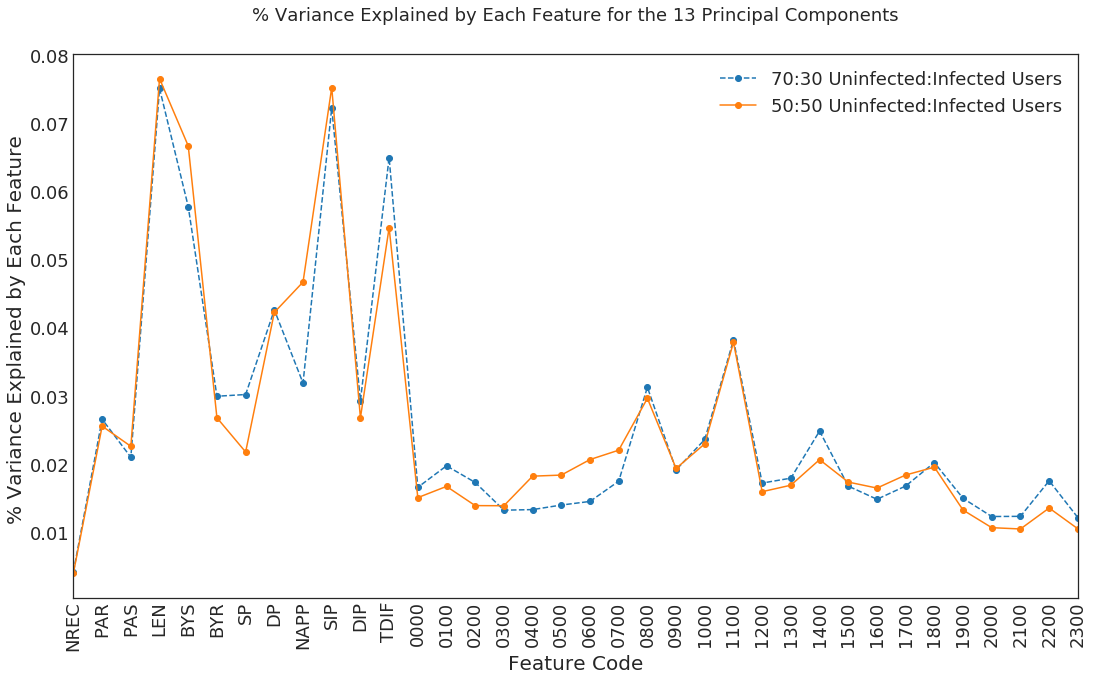

In [34]:
### Plot the variance explained by each feature for the decided number of components of PCA for both the 50:50 ratio and 
### 70:30 ratio of Uninfected:Infected Users
sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data_70.std(axis=0)), '--o', label = '70:30 Uninfected:Infected Users')
plt.plot(np.square(pca_inv_data_50.std(axis=0)), '-o', label = '50:50 Uninfected:Infected Users')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('% Variance Explained by Each Feature for the 13 Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

### For the rest of part 2,i.e. for 70:30 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 6.92335802294e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,0.0,2956.00
uninfected#,3.0,8865.00
infected%,0.0,25.01
uninfected%,100.0,74.99


Sum of square of distances is: 2.42649885536e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2944.00,0.0,12.00
uninfected#,8821.00,3.0,44.00
infected%,25.02,0.0,21.43
uninfected%,74.98,100.0,78.57


Sum of square of distances is: 1.66563016197e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2944.00,0.0,0.0,12.00
uninfected#,8821.00,1.0,2.0,44.00
infected%,25.02,0.0,0.0,21.43
uninfected%,74.98,100.0,100.0,78.57


Sum of square of distances is: 1.27015983194e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



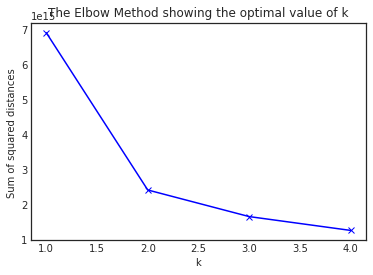

The minimum sum of sqaures of distances is : 1.27015983194e+15  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [35]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 425664.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8867.0,1.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 336044.082714

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,872.0,2084.00,0.0
uninfected#,300.0,8567.00,1.0
infected%,74.4,19.57,0.0
uninfected%,25.6,80.43,100.0


Sum of square of distances is: 251187.586281

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,963.00,1875.00,0.0,118.00
uninfected#,7658.00,1189.00,1.0,20.00
infected%,11.17,61.19,0.0,85.51
uninfected%,88.83,38.81,100.0,14.49


Sum of square of distances is: 204704.70416

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



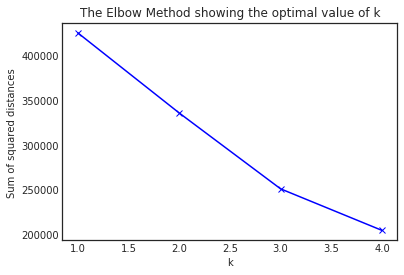

The minimum sum of sqaures of distances is : 204704.70416  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [36]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.736541194795 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 35469.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8867.0,1.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 26372.1968487

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2956.00,0.0,0.0
uninfected#,8863.00,1.0,4.0
infected%,25.01,0.0,0.0
uninfected%,74.99,100.0,100.0


Sum of square of distances is: 18229.1907382

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,1883.00,0.0,1073.00,0.0
uninfected#,1188.00,1.0,7675.00,4.0
infected%,61.32,0.0,12.27,0.0
uninfected%,38.68,100.0,87.73,100.0


Sum of square of distances is: 12160.1429373

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



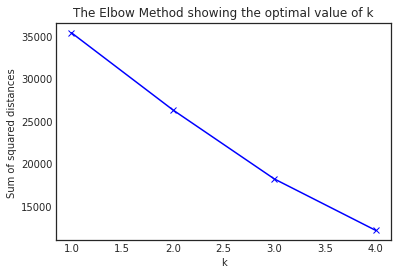

The minimum sum of sqaures of distances is : 12160.1429373  for k 4


In [37]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.782159376915 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 47292.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8867.0,1.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 37848.7564853

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2956.00,0.0,0.0
uninfected#,8863.00,4.0,1.0
infected%,25.01,0.0,0.0
uninfected%,74.99,100.0,100.0


Sum of square of distances is: 29702.8394013

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,879.00,2077.00,0.0,0.0
uninfected#,7321.00,1542.00,1.0,4.0
infected%,10.72,57.39,0.0,0.0
uninfected%,89.28,42.61,100.0,100.0


Sum of square of distances is: 23175.558472

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



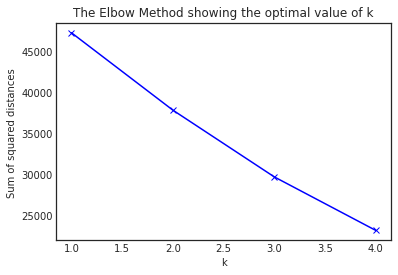

The minimum sum of sqaures of distances is : 23175.558472  for k 4


In [38]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.813594143086 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 59115.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8867.0,1.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 49670.6297792

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2956.00,0.0,0.0
uninfected#,8863.00,4.0,1.0
infected%,25.01,0.0,0.0
uninfected%,74.99,100.0,100.0


Sum of square of distances is: 41491.8057236

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2449.00,0.0,0.0,507.00
uninfected#,2248.00,1.0,4.0,6615.00
infected%,52.14,0.0,0.0,7.12
uninfected%,47.86,100.0,100.0,92.88


Sum of square of distances is: 34523.6633182

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



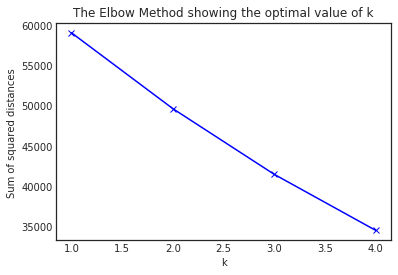

The minimum sum of sqaures of distances is : 34523.6633182  for k 4


In [39]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.840690906068 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 70938.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8867.0,1.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 61420.6289273

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2446.00,510.00,0.0
uninfected#,2226.00,6641.00,1.0
infected%,52.35,7.13,0.0
uninfected%,47.65,92.87,100.0


Sum of square of distances is: 54423.2042504

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2956.00,0.0,0.0,0.0
uninfected#,8862.00,1.0,3.0,2.0
infected%,25.01,0.0,0.0,0.0
uninfected%,74.99,100.0,100.0,100.0


Sum of square of distances is: 46520.157096

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



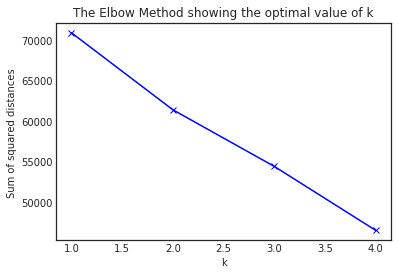

The minimum sum of sqaures of distances is : 46520.157096  for k 4


In [40]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.914421142347 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 106407.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8866.0,2.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 96533.0606204

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2956.00,0.0,0.0
uninfected#,8865.00,2.0,1.0
infected%,25.01,0.0,0.0
uninfected%,74.99,100.0,100.0


Sum of square of distances is: 86802.3443818

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2956.00,0.0,0.0,0.0
uninfected#,8862.00,3.0,1.0,2.0
infected%,25.01,0.0,0.0,0.0
uninfected%,74.99,100.0,100.0,100.0


Sum of square of distances is: 78170.119082

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



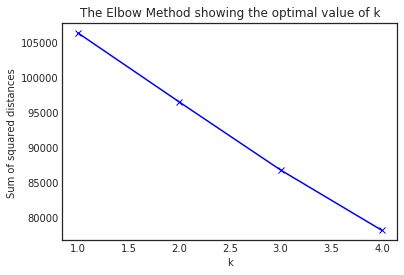

The minimum sum of sqaures of distances is : 78170.119082  for k 4


In [41]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.938163876137 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 130053.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8867.0,1.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 120081.968904

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,423.00,0.0,2533.00
uninfected#,5902.00,2.0,2964.00
infected%,6.69,0.0,46.08
uninfected%,93.31,100.0,53.92


Sum of square of distances is: 111775.269302

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,2533.00,0.0,0.0,423.00
uninfected#,2965.00,2.0,3.0,5898.00
infected%,46.07,0.0,0.0,6.69
uninfected%,53.93,100.0,100.0,93.31


Sum of square of distances is: 103142.551123

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



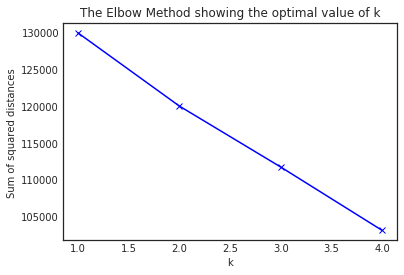

The minimum sum of sqaures of distances is : 103142.551123  for k 4


In [42]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.946748515333 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 141876.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8867.0,1.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 131770.340633

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,2956.00,0.0,0.0
uninfected#,8865.00,2.0,1.0
infected%,25.01,0.0,0.0
uninfected%,74.99,100.0,100.0


Sum of square of distances is: 121895.913066

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,431.00,0.0,2521.0,4.00
uninfected#,6187.00,2.0,2677.0,2.00
infected%,6.51,0.0,48.5,66.67
uninfected%,93.49,100.0,51.5,33.33


Sum of square of distances is: 115217.831626

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



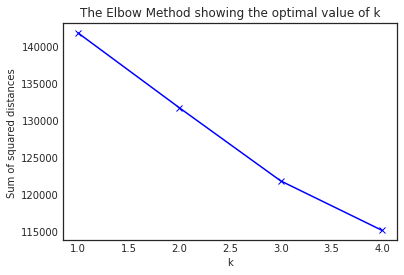

The minimum sum of sqaures of distances is : 115217.831626  for k 4


In [43]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.954459969079 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels,0
infected#,2956.0
uninfected#,8868.0
infected%,25.0
uninfected%,75.0


Sum of square of distances is: 153699.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,2956.0,0.0
uninfected#,8867.0,1.0
infected%,25.0,0.0
uninfected%,75.0,100.0


Sum of square of distances is: 143495.866771

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,872.00,0.0,2084.00
uninfected#,7547.00,1.0,1320.00
infected%,10.36,0.0,61.22
uninfected%,89.64,100.0,38.78


Sum of square of distances is: 135122.507133

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,345.00,1124.00,0.0,1487.00
uninfected#,5573.00,2480.00,2.0,813.00
infected%,5.83,31.19,0.0,64.65
uninfected%,94.17,68.81,100.0,35.35


Sum of square of distances is: 128316.604544

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



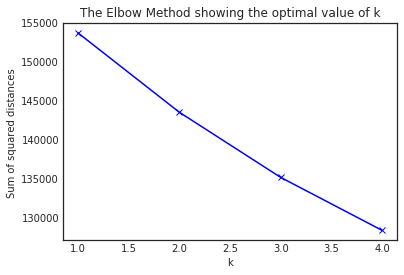

The minimum sum of sqaures of distances is : 128316.604544  for k 4


In [44]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

In [45]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')